In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,2.885342,41.0,2.642750,1.011835,17.944358,1.598611,4.526
1,2.881215,21.0,2.497626,0.985840,49.000000,1.452529,3.585
2,2.375521,52.0,2.411919,1.035886,23.622024,1.596228,3.413
3,1.961173,52.0,2.506363,1.039750,23.769729,1.476979,3.422
4,2.009179,52.0,2.182122,1.050537,20.322401,1.462838,2.697
...,...,...,...,...,...,...,...
14884,1.926785,28.0,2.603665,1.071567,32.264532,1.739587,1.168
14885,1.249120,25.0,2.246209,1.064581,29.068884,1.600189,0.781
14886,1.303840,17.0,2.281566,1.058344,31.733263,1.525003,0.923
14887,1.366455,18.0,2.308574,1.082552,27.221315,1.457124,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14889 entries, 0 to 14888
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14889 non-null  float64
 1   HouseAge    14889 non-null  float64
 2   AveRooms    14889 non-null  float64
 3   AveBedrms   14889 non-null  float64
 4   Population  14889 non-null  float64
 5   AveOccup    14889 non-null  float64
 6   Price       14889 non-null  float64
dtypes: float64(7)
memory usage: 814.4 KB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000
mean,1.933673,28.892538,2.298884,1.024695,36.343690,1.689283,2.043730
std,0.384877,12.308899,0.218947,0.028318,9.572570,0.157067,1.064923
min,1.121383,2.000000,1.744064,0.969137,17.349352,1.373450,0.149990
25%,1.644810,19.000000,2.146279,1.004228,29.461840,1.574249,1.234000
50%,1.912799,29.000000,2.301573,1.022379,34.985711,1.680560,1.841000
75%,2.193741,37.000000,2.448672,1.042864,41.821047,1.792894,2.616000
max,2.990652,52.000000,2.877453,1.105469,68.687699,2.074932,5.000010


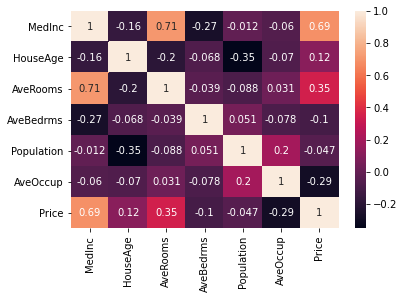

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
X = df.drop(columns=['Price'])
y = df['Price']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [11]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((11911, 6), (2978, 6), (11911,), (2978,))

In [12]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
10612,1.988592,26.0,2.424403,1.013734,45.442271,1.733731
32,1.652362,51.0,2.229802,1.034841,35.468296,1.531997
6035,1.807484,23.0,1.964830,1.071172,25.884358,1.633806
9275,2.122875,16.0,2.328222,1.006167,35.566838,1.615007
6370,2.292837,39.0,2.171844,1.008483,39.610605,1.434000
...,...,...,...,...,...,...
11808,1.877765,17.0,2.394495,1.046723,40.693980,1.504093
6012,2.350638,40.0,2.239691,1.005391,22.825424,1.678159
13955,1.896286,9.0,2.289455,0.998374,49.598387,1.632551
6558,1.131106,33.0,2.082299,1.001974,25.039968,1.574249


In [13]:
models = []
models.append(('Linear Regression',LinearRegression()))
models.append(('Ridge Regression',Ridge()))
models.append(('Lasso Regression',Lasso()))
models.append(('Decison Tree Regressor',DecisionTreeRegressor()))
models.append(('Random Forest Regressor',RandomForestRegressor()))
models.append(('Gradient BoostRegressor',GradientBoostingRegressor()))

Linear Regression
Train Score:  0.6209440367898487
Test Score:  0.6433723824193227
Mean Squared error:  0.4096008916711456
Mean Absolute error:  0.4915821685026791
Cross validation Score:  0.5730067266749799



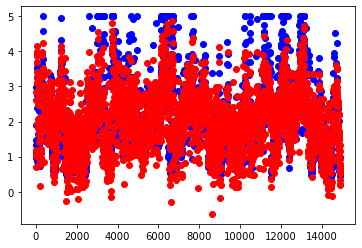


Ridge Regression
Train Score:  0.6207694918682269
Test Score:  0.6428993441917803
Mean Squared error:  0.410144194742036
Mean Absolute error:  0.4920548578555359
Cross validation Score:  0.5724957845794897



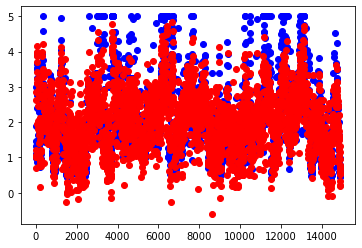


Lasso Regression
Train Score:  0.006787725590469362
Test Score:  0.007765527773723746
Mean Squared error:  1.1396204459089314
Mean Absolute error:  0.8449957943429506
Cross validation Score:  -0.10906204485880303



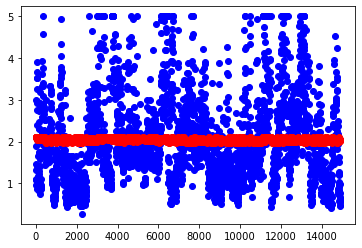


Decison Tree Regressor
Train Score:  1.0
Test Score:  0.3905238549006481
Mean Squared error:  0.7000074031801881
Mean Absolute error:  0.611407676292814
Cross validation Score:  0.2514097646949011



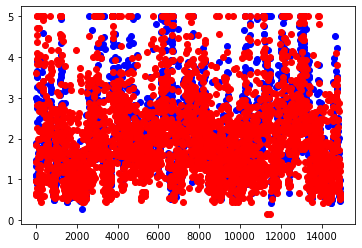


Random Forest Regressor
Train Score:  0.9543176399535528
Test Score:  0.686482622729925
Mean Squared error:  0.36008707950155
Mean Absolute error:  0.4453416623908665
Cross validation Score:  0.6038181956594733



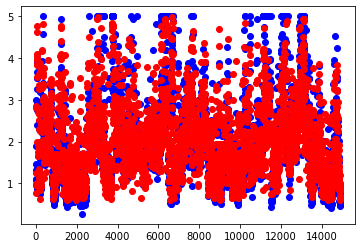


Gradient BoostRegressor
Train Score:  0.7056770025758585
Test Score:  0.693518172584245
Mean Squared error:  0.3520064728640835
Mean Absolute error:  0.4417369649286194
Cross validation Score:  0.611932050499918



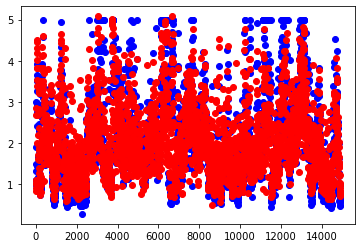

In [14]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Train Score: ",model.score(X_train,y_train))
    print("Test Score: ",model.score(X_test,y_test))
    print("Mean Squared error: ",mean_squared_error(y_test,pred))
    print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
    cv_results = cross_val_score(model,X,y,cv=5)
    print("Cross validation Score: ",cv_results.mean())
    actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
    print()
    plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
    plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
    plt.show()
    print()

### Random Forest Regressor and Gradient boost Regressor are giving the best Scores among the used models i.e 60% and 61% CV Scores Respectively.
- HyperParameter Tuning on Random Forest Regressor using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
tuned_parameters = {'max_depth': [30,50,70,90], 'min_samples_split': [20,40,60]}

In [20]:
grid_search  = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30, 50, 70, 90],
                         'min_samples_split': [20, 40, 60]})

In [22]:
grid_search.best_params_

{'max_depth': 90, 'min_samples_split': 20}

Train Score:  0.7875307272084663
Test Score:  0.6959249256696933
Mean Squared error:  0.3492422219725807
Mean Absolute error:  0.43665852099901364
Cross validation Score:  0.6134266577460694



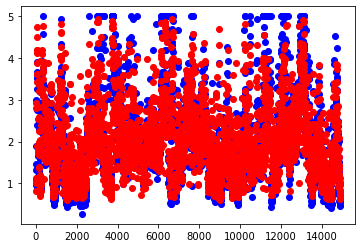

In [24]:
model = RandomForestRegressor(max_depth=80,min_samples_split=40)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))
print("Mean Squared error: ",mean_squared_error(y_test,pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
cv_results = cross_val_score(model,X,y,cv=5)
print("Cross validation Score: ",cv_results.mean())
actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
print()
plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
plt.show()
print()

In [25]:
model.predict([np.array([8.33,1000,7000,1000,31323,13123])])

array([4.46865725])

In [26]:
import pickle

In [27]:
pickle.dump(model,open('model.pkl','wb'))

#### Changes in hyperparameters is not showing much impact on Gradient Boost Regressor.

Train Score:  0.7054826262459177
Test Score:  0.6934229616683683
Mean Squared error:  0.35211582635808525
Mean Absolute error:  0.44175089460517236
Cross validation Score:  0.6126708242017298



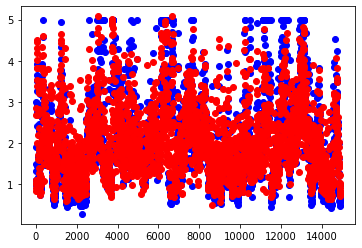

In [28]:
model = GradientBoostingRegressor(min_samples_split=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("Train Score: ",model.score(X_train,y_train))
print("Test Score: ",model.score(X_test,y_test))
print("Mean Squared error: ",mean_squared_error(y_test,pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,pred))
cv_results = cross_val_score(model,X,y,cv=5)
print("Cross validation Score: ",cv_results.mean())
actual_pred = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
print()
plt.scatter(actual_pred['Actual'].index,actual_pred['Actual'],color='blue')
plt.scatter(actual_pred['Predicted'].index,actual_pred['Predicted'],color='red')
plt.show()
print()

### So the Best Models are GradientBoostingRegressor and RandomForestRegressor With 61% CV Scores